###  Исследование объявлений о продаже квартир
--------------------

In [1]:
# импортируем необходимые библиотеки
# и ознакомимся с данными 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn')
%matplotlib inline
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
pd.set_option('display.max_columns', None)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [3]:
df.describe(include='all')


,building_series_id,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,area,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,6517,23699.000000,2.369900e+04,23699.000000,23699,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,2775,23699,23699.000000,23699,21421.000000,12180.000000,23650,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
unique,121,NaN,NaN,NaN,1491,NaN,NaN,NaN,NaN,NaN,2,2,NaN,2,NaN,NaN,364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1564812.0,NaN,NaN,NaN,2018-02-01T00:00:00,NaN,NaN,NaN,NaN,NaN,False,False,NaN,False,NaN,NaN,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2807,NaN,NaN,NaN,368,NaN,NaN,NaN,NaN,NaN,2725,23550,NaN,23632,NaN,NaN,15721,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,9.858475,6.541549e+06,60.348651,NaN,2.070636,2.771499,10.673824,34.457852,5.892358,NaN,NaN,60.348651,NaN,10.569807,1.150082,NaN,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,NaN,5.682529,1.088701e+07,35.654083,NaN,1.078405,1.261056,6.597173,22.030445,4.885249,NaN,NaN,35.654083,NaN,5.905438,1.071300,NaN,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,NaN,0.000000,1.219000e+04,12.000000,NaN,0.000000,1.000000,1.000000,2.000000,1.000000,NaN,NaN,12.000000,NaN,1.300000,0.000000,NaN,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,NaN,6.000000,3.400000e+06,40.000000,NaN,1.000000,2.520000,5.000000,18.600000,2.000000,NaN,NaN,40.000000,NaN,7.000000,0.000000,NaN,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,NaN,9.000000,4.650000e+06,52.000000,NaN,2.000000,2.650000,9.000000,30.000000,4.000000,NaN,NaN,52.000000,NaN,9.100000,1.000000,NaN,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,NaN,14.000000,6.800000e+06,69.900000,NaN,3.000000,2.800000,16.000000,42.300000,8.000000,NaN,NaN,69.900000,NaN,12.000000,2.000000,NaN,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000



  * При первичном общем рассмотрении данных видно, что крайне мало данных о серии дома (building_series_id) (~ 27%)     
  * О том является ли жилье апартаментами (is_apartment) (~ 12 %).    
  * Также имеются дубликаты столбцов area и total_area (проверим это)   
  * Максимальная высота потолков 100 м, и минимальная 1 м - ошибка в данных.    



In [4]:
# Проверка наличия дубликата столбца
df[df['total_area'] != df['area']]

,building_series_id,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,area,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Получили пустой датафрейм, значит во всех строках столбцов 'total_area' и 'area' содержатся одинаковые значения.  
Удалим столбец 'area'  

In [5]:
df.drop(['area'], axis=1, inplace=True)


Для удобства последующего анализа и минимизации конфликтов в коде необходимо преобразовать данные  

In [6]:
# Преобразуем типы данных для цены, площади и количества этажей в целочисленные  
df[['last_price', 'total_area']] = df[['last_price', 'total_area']].astype('int')

# Приведем столбец с апартаментами к булеву типу
df['is_apartment'] = df['is_apartment'].fillna(0)
df['is_apartment'] = df['is_apartment'].astype('bool')

# Также поступим с данными о балконах
df['balcony'] = df['balcony'].fillna(0)
df['balcony'] = df['balcony'].astype('bool')

In [7]:
#Рассчитаем доли жилой части и кухни в общей площади квартиры
df['living_area_part'] = (df['living_area'] / df['total_area']).map('{:.2f}'.format).astype('float')
df['kitchen_area_part'] = (df['kitchen_area'] / df['total_area']).map('{:.2f}'.format).astype('float')

In [8]:
# переведем формат столбца с датой публикации в формат datetime
# добавим 3 столбца с названием: дня недели, месяца и года публикации объявления
df['first_day_exposition']= pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S') 
df['day'] = df['first_day_exposition'].dt.weekday
df['month'] = df['first_day_exposition'].dt.month                        
df['year'] = df['first_day_exposition'].dt.year  

# Добавим столбец с индексами 
df['id'] = df.index

In [9]:
# рассчитаем цену квадратного метра и преобразуем целочисленному типу 'int'
df['sq_metre_price'] = (df['last_price']/df['total_area'])
df['sq_metre_price'] = df['sq_metre_price'].astype('int')
df.head()

,building_series_id,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_area_part,kitchen_area_part,day,month,year,id,sq_metre_price
0,1564812,20,13000000,108,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,False,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,0.47,0.23,3,3,2019,0,120370
1,NaN,7,3350000,40,2018-12-04,1,NaN,11.0,18.6,1,False,False,False,11.0,True,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,0.47,0.28,1,12,2018,1,83750
2,Сталинский,10,5196000,56,2015-08-20,2,NaN,5.0,34.3,4,False,False,False,8.3,False,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,0.61,0.15,3,8,2015,2,92785
3,NaN,0,64900000,159,2015-07-24,3,NaN,14.0,NaN,9,False,False,False,NaN,False,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,NaN,NaN,4,7,2015,3,408176
4,NaN,2,10000000,100,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,False,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,0.32,0.41,1,6,2018,4,100000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 30 columns):
building_series_id      6517 non-null object
total_images            23699 non-null int64
last_price              23699 non-null int64
total_area              23699 non-null int64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 23699 non-null bool
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest   

In [11]:
# проверим наличие строк со значениями долей кухни или жилой площади больше 1
# (площадь кухни или жилой части больше чем общая площадь )          
df.drop(df.query('kitchen_area_part>= 1 or living_area_part>= 1').index, inplace=True)
# Проверим сколько строк с неправильным соотношеним площадей мы удалили
df.shape

(23695, 30)

Удалено 4 строки.

In [12]:
# проверим нет ли очень низких или очень высоких потолков. За нормальный диапазон примем интервал от 2.4 до 6.0 м
df.query('ceiling_height <= 2.4 or ceiling_height >= 6.0').shape

(74, 30)

In [13]:
# Удалим строки, где значения высоты потолка ниже или выше установленного интервала
df.drop(df.query('ceiling_height <= 2.4 or ceiling_height >= 6.0').index, inplace=True)
df.shape[0]

23621

In [14]:
# Удалим строки, где количество комнат 0 и квартира не является студией
df.drop(df.query('rooms==0 and studio==False').index, inplace=True)
df.shape[0]

23566

In [15]:
# Функция для категоризации этажей
# Если столбец "floors_total" 
# содержит NaN, то функция вернет "неизвестно"

def category_of_floor(row):
    floor=row['floor']
    floors_total=row['floors_total']
    if pd.isnull(floors_total):
        return 'неизвестно'
    if floor == floors_total:
        return 'последний'
    if floor == 1:
        return 'первый'
    return 'другой'

# Создадим новый столбец с категориями, применив функцию к датафрейму
df['floor_category'] = df.apply(category_of_floor, axis=1)    
# Проверим количество строк для которых было пропущено количество этажей
df.query('floor_category=="неизвестно"').shape     

(86, 31)

In [16]:
# Функция для категоризации каждого объекта по отношению к удаленности от центра
# Если столбец "cityCenters_nearest" 
# содержит NaN, то функция вернет "неизвестно"
# Объекты в радиусе 3 км - центр,
#от 3 до 7 км средняя удаленность, 
#от 7 до 15 км далеко - пешком уже не дойти
# все что дальше 15 км - очень далеко 

def category_of_location(row):
    cityCenters_nearest = row['cityCenters_nearest']
    if pd.isnull(cityCenters_nearest):
        return 'неизвестно'
    if cityCenters_nearest <= 3000:
        return 'центр'
    if cityCenters_nearest > 3000 and cityCenters_nearest <= 7000:
        return 'средне'
    if cityCenters_nearest > 7000 and cityCenters_nearest <= 15000:
        return 'далеко'
    return 'очень далеко'

# Создадим новый столбец с категориями, применив функцию к датафрейму
df['city_center_category'] = df.apply(category_of_location, axis=1) 

# Проверим количество строк для которых значение расстояния до центра было пропущено
df.query('city_center_category =="неизвестно"').shape

(5459, 32)

Проверим наличие дубликатов

In [17]:
df.duplicated().sum()

0

Дубликатов не выявлено

In [18]:
# Проверим количество пропусков в различных столбцах, критичными для оценки цены являются данные о расположении 
# квартиры (locality_name), если такие пропуски есть их нужно удалить.
df.isnull().sum()

building_series_id      17063
total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9145
floors_total               86
living_area              1895
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2208
balcony                     0
locality_name              49
airports_nearest         5482
cityCenters_nearest      5459
parks_around3000         5458
parks_nearest           15520
ponds_around3000         5458
ponds_nearest           14501
days_exposition          3169
living_area_part         1895
kitchen_area_part        2208
day                         0
month                       0
year                        0
id                          0
sq_metre_price              0
floor_category              0
city_center_category        0
dtype: int64

In [19]:
df.dropna(subset=['locality_name'], inplace=True)

In [20]:
df['locality_name'].isnull().sum()

0

Рассчитаем количество географических локаций (города, села, деревни)

In [21]:
df['locality_name'].value_counts().count()

362

Для столбца 'locality_name' нужно провести лемматизацию

In [22]:
df['locality_name'] = df['locality_name'].str.lower()

In [23]:
from pymystem3 import Mystem
m = Mystem()

def lemmas(locality_name):
    lemmas_list = ' '.join(m.lemmatize(locality_name))
    return lemmas_list

df['lemma_locality_name'] = df['locality_name'].apply(lemmas).values.tolist()


Посмотрим на самые большие (по объему предложения) населенные пункты 

In [24]:
from collections import Counter
lemma_locality_name = df['locality_name'].values.tolist()
Counter(lemma_locality_name).most_common(12)

[('санкт-петербург', 15660),
 ('посёлок мурино', 514),
 ('посёлок шушары', 440),
 ('всеволожск', 397),
 ('пушкин', 366),
 ('колпино', 337),
 ('посёлок парголово', 323),
 ('гатчина', 306),
 ('деревня кудрово', 287),
 ('выборг', 235),
 ('петергоф', 201),
 ('сестрорецк', 183)]

Выберем Топ-10 населенных пунктов с наибольшим числом объявлений, за исключением СПб и Выборга (он в ~174 км от СПб, под определение "пригород" не очень подходит).

In [25]:
top_suburb = ['посёлок мурино', 'посёлок шушары', 'всеволожск',
              'пушкин', 'колпино', 'посёлок парголово','гатчина',
              'деревня кудрово', 'петергоф', 'сестрорецк']
# Создадим столбец с категориями пригорода
def suburban_on_top(row):
    locality_name=row['locality_name']
    
    if locality_name in top_suburb:
        return locality_name
    if locality_name == 'санкт-петербург':
        return 'СПБ'
    return 'остальные'
df['suburbans'] = df.apply(suburban_on_top, axis=1) 

In [26]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 23517 entries, 0 to 23698
Data columns (total 34 columns):
building_series_id      6501 non-null object
total_images            23517 non-null int64
last_price              23517 non-null int64
total_area              23517 non-null int64
first_day_exposition    23517 non-null datetime64[ns]
rooms                   23517 non-null int64
ceiling_height          14407 non-null float64
floors_total            23432 non-null float64
living_area             21627 non-null float64
floor                   23517 non-null int64
is_apartment            23517 non-null bool
studio                  23517 non-null bool
open_plan               23517 non-null bool
kitchen_area            21318 non-null float64
balcony                 23517 non-null bool
locality_name           23517 non-null object
airports_nearest        18043 non-null float64
cityCenters_nearest     18066 non-null float64
parks_around3000        18067 non-null float64
parks_nearest   

#### Оценка "адекватного" диапазона цен на жилье

Получим числовое описание данных столбца с ценой на момент снятия с публикации

In [27]:
df['last_price'].describe().round()

count        23517.0
mean       6550774.0
std       10890978.0
min          12190.0
25%        3450000.0
50%        4650000.0
75%        6800000.0
max      763000000.0
Name: last_price, dtype: float64

12 тыс рублей и 763 млн за квартиру выглядят неправдоподобно, посмотрим как они распределены на гистограмме



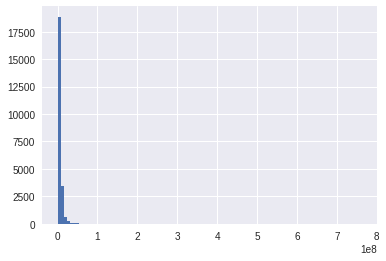

In [28]:
df['last_price'].hist(bins=100)

(0, 15000000)

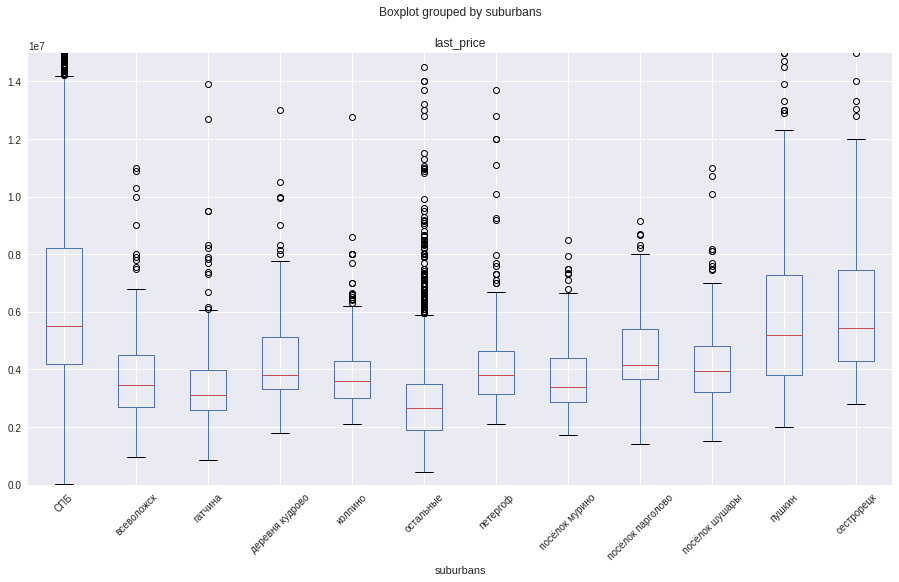

In [29]:
# рассмотрим boxplot для различных групп локации для определения минимальной и максимальной цены
df.boxplot(by='suburbans', column='last_price', figsize=(15,8), rot=45)
plt.ylim(0, 15000000)

In [30]:
df.query('last_price >= 6000000 and suburbans=="остальные"').shape

(148, 34)

Верхний "ус" боксплота для категории "остальные" упирается в 6 млн.рублей, после чего наблюдаются "выбросы" - 148 строк.  
Также видно, что верхний "ус" для СПб немного выходит за границу в 14 млн. рублей  
Сократим гистограмму до 100 млн, в качестве нижней границы пока примем 12 тыс.рублей   

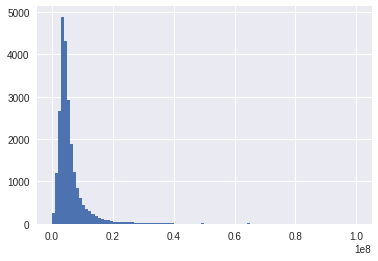

In [31]:
df['last_price'].hist(bins=100, range=(12000, 100000000))

После 40 млн практически нет предложений на рынке, за исключением отдельных "участков" на ~50 и ~ 63 млн рублей  
Также из числового описания данных следует что на рынке есть предложения за 763 млн рублей  
Посмотрим сколько квартир стоит более 40 млн рублей  

In [32]:
#df[df['last_price']>=40000000].count()
df[df['last_price']>=40000000].shape

(192, 34)

Квартир стоимостью более 40 млн 193 шт (туда попадают и аномалии вроде 763 млн), это меньше 1 %
Поскольку выборка небольшая, то установить влияние параметров на цену таких квартир будет затруднительно  
Можно в качестве верхнего предела цены установить значение 40 млн рублей, но и квартир в диапазоне 20 - 40 млн рублей достаточно мало.  


In [33]:
df.query('last_price >= 20000000 and last_price <= 40000000').shape


(540, 34)

Квартир в диапазоне 20 - 40 млн рублей 540 шт, это ~ 2,2 %  



Рассмотрим нижний диапазон цены, из числового описания следует что есть предложения за 12 тыс рублей, 
маловероятно что кто-то готов продать квартиру за такую цену.  
Рассмотрим гистограмму цен в пределах от 12 тыс до 1,5 млн рублей  

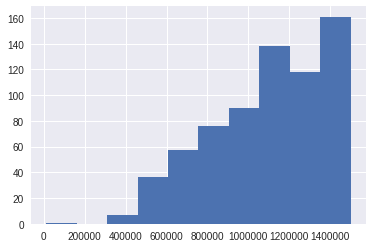

In [34]:
df['last_price'].hist(bins=10, range=(12190, 1500000))


Рассмотрим предложения стоимостью менее 400 тыс рублей

In [35]:
df.query('last_price <= 400000')


,building_series_id,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_area_part,kitchen_area_part,day,month,year,id,sq_metre_price,floor_category,city_center_category,lemma_locality_name,suburbans
8793,1564812.0,7,12190,109,2019-03-20,2,2.75,25.0,32.0,25,False,False,False,40.5,False,санкт-петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0,0.29,0.37,2,3,2019,8793,111,последний,далеко,санкт-петербург \n,СПБ


Стоимость 12 тыс рублей за 2-к квартиру 109 кв метров в 9 км от центра Питера, очень маловероятно, скорее всего ошибка в описании. Хорошо что такая квартира всего одна.

Для определения нижней границы цены посмотрим сколько минимально стоит недвижимость, для анализа используем столбец с категориями населенных пунктов suburbans.


In [36]:
(df
    .pivot_table(index='suburbans', values='last_price', aggfunc='min')
    .sort_values(by='last_price', ascending=True)    
)

,last_price
suburbans,
СПБ,12190
остальные,430000
гатчина,850000
всеволожск,965780
посёлок парголово,1400000
посёлок шушары,1500000
посёлок мурино,1730000
деревня кудрово,1800000
пушкин,1990000


Про квартиру в Питере за 12 тыс. рублей все понятно - это ошибка, в категорию "остальные" столбца suburbans попали все деревни, поселки и города Ленинградской области не расположенные в непосредственной близости от Питера. 

Посмотрим как распределены цены для этой категории

In [37]:
df.query('suburbans=="остальные"')['last_price'].describe().round()

count        4503.0
mean      2894702.0
std       1658270.0
min        430000.0
25%       1890000.0
50%       2650000.0
75%       3500000.0
max      28000000.0
Name: last_price, dtype: float64

Первая квартиль для категории "остальные" на отметке в почти 2 млн рублей, а минимальная цена 430 тыс.рублей, при этом на боксплоте для остальных категорий нижний "ус" едва доходит до 1 млн. рублей  
Поэтому примем в качестве нижней цены 1 млн, а с учетом того, что на боксплоте верхний "ус" для Питера едва выходит за 14 млн., примем 14 млн.рублей в качестве верхней границы цены
Также удалим выбросы для верхнего диапазона цен категории "остальные".  
Для остальных категорий  выбросов не такое много, как для категории "остальные"
Итог:
-------
Нижняя граница 1 млн  
Верхняя граница 14 млн  
Выбросы категории "остальные" - все что дороже 6 млн.   

In [38]:
df.shape[0]

23517

In [39]:
df = df.query('1000000 <= last_price <= 14000000')

In [40]:
df.shape[0]

21905

In [41]:
#df = df.query('last_price >= 6000000 and suburbans=="остальные"')
df.drop(df.query('last_price >= 6000000 and suburbans=="остальные"').index, inplace=True)

In [42]:
df.shape[0]

21767

(0, 15000000)

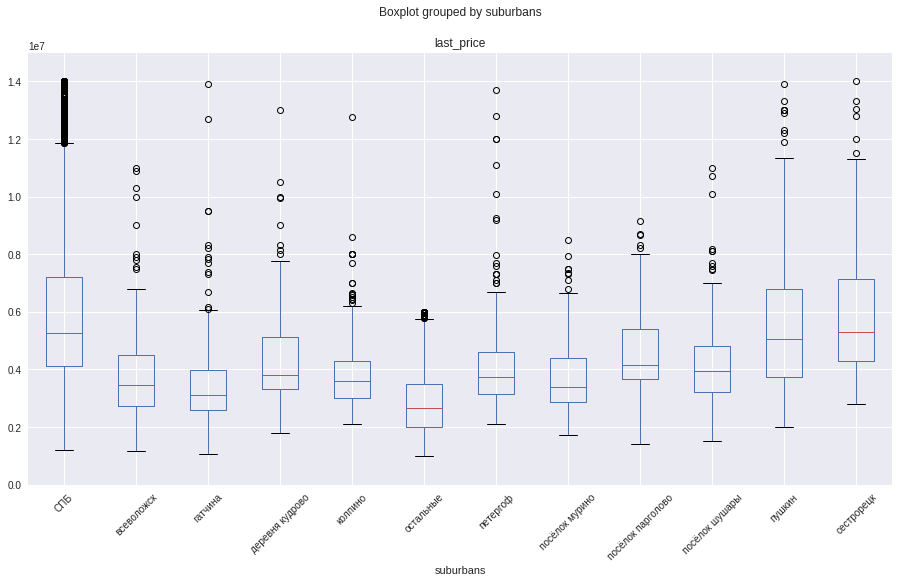

In [43]:
df.boxplot(by='suburbans', column='last_price', figsize=(15,8), rot=45)
plt.ylim(0, 15000000)

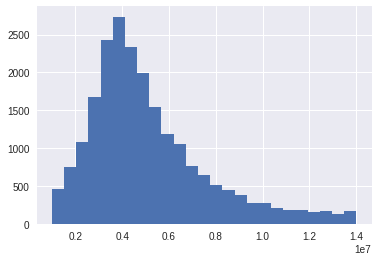

In [44]:
df['last_price'].hist(bins=25)

In [45]:
df.describe(include='all').round()

,building_series_id,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_area_part,kitchen_area_part,day,month,year,id,sq_metre_price,floor_category,city_center_category,lemma_locality_name,suburbans
count,6052,21767.0,21767.0,21767.0,21767,21767.0,13291.0,21690.0,20092.0,21767.0,21767,21767,21767,19765.0,21767,21767,16627.0,16642.0,16643.0,7050.0,16643.0,8064.0,19083.0,20092.0,19765.0,21767.0,21767.0,21767.0,21767.0,21767.0,21767,21767,21767,21767
unique,120,NaN,NaN,NaN,1484,NaN,NaN,NaN,NaN,NaN,2,2,2,NaN,2,330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,5,295,12
top,1564812.0,NaN,NaN,NaN,2018-02-01 00:00:00,NaN,NaN,NaN,NaN,NaN,False,False,False,NaN,False,санкт-петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,другой,далеко,санкт-петербург \n,СПБ
freq,2494,NaN,NaN,NaN,338,NaN,NaN,NaN,NaN,NaN,21731,21620,21760,NaN,13950,14315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16006,8080,14315,14315
first,NaN,NaN,NaN,NaN,2014-11-27 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2019-05-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,10.0,5118095.0,54.0,NaN,2.0,3.0,11.0,31.0,6.0,NaN,NaN,NaN,10.0,NaN,NaN,28844.0,14664.0,1.0,489.0,1.0,529.0,176.0,1.0,0.0,3.0,6.0,2017.0,11844.0,94436.0,NaN,NaN,NaN,NaN
std,NaN,6.0,2553286.0,21.0,NaN,1.0,0.0,7.0,15.0,5.0,NaN,NaN,NaN,4.0,NaN,NaN,12857.0,8446.0,1.0,331.0,1.0,277.0,215.0,0.0,0.0,2.0,3.0,1.0,6833.0,29965.0,NaN,NaN,NaN,NaN
min,NaN,0.0,1000000.0,12.0,NaN,0.0,2.0,1.0,2.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,0.0,208.0,0.0,1.0,0.0,13.0,1.0,0.0,0.0,0.0,1.0,2014.0,0.0,10507.0,NaN,NaN,NaN,NaN
25%,NaN,6.0,3400000.0,39.0,NaN,1.0,2.0,5.0,18.0,2.0,NaN,NaN,NaN,7.0,NaN,NaN,18206.0,10257.0,0.0,289.0,0.0,312.0,44.0,0.0,0.0,1.0,3.0,2017.0,5924.0,76388.0,NaN,NaN,NaN,NaN


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3209f103c8>,
      dtype=object)

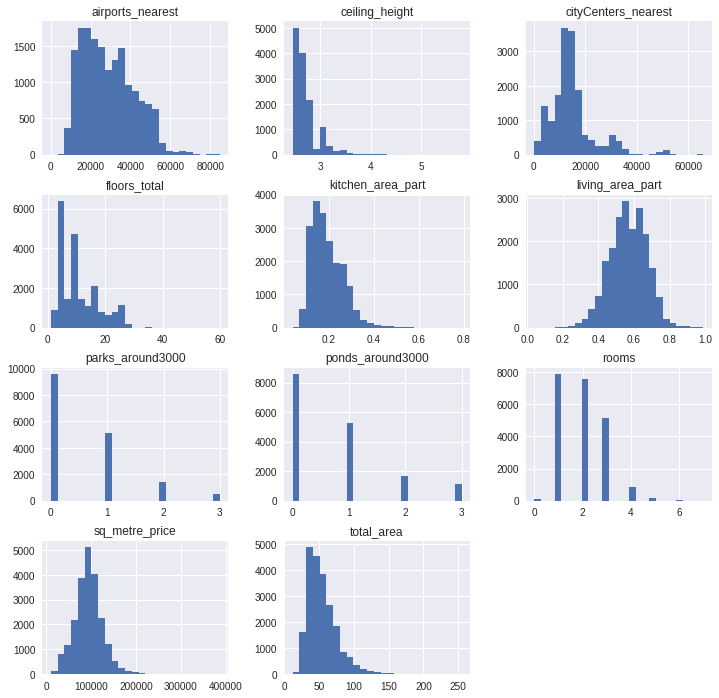

In [46]:
#  Создадим список с осными параметрами, которые могут влиять на цену
main_values=['sq_metre_price', 'total_area', 'rooms',
                    'living_area_part', 'kitchen_area_part',
                    'cityCenters_nearest', 'floors_total', 
                    'airports_nearest','ceiling_height',
                    'parks_around3000', 'ponds_around3000',]
# Построим гистограммы распределения для этих параметров
df[main_values].hist(bins=25, figsize=(12, 12))


Из анализа распределения следует наличие выбросов в столбцах:  
* с высотой потолка - более 4-х метров  
* с количеством этажей - более 30 этажей
* долю кухни в общей площади  - более 0,5
* долю жилой площади от 0,2 до 0,85
* полную площадь, более 140 кв.метров
* ценой за квадратный метр - более 230 и менее 25 тыс.руб/кв.метр


In [47]:
df.shape[0]

21767

In [48]:
# Удалим выбросы
df.drop(df.query('ceiling_height > 4.0').index, inplace=True)
df.drop(df.query('floors_total > 30').index, inplace=True)
df.drop(df.query('kitchen_area_part > 0.5').index, inplace=True)
df.drop(df.query('living_area_part > 0.85').index, inplace=True)
df.drop(df.query('living_area_part < 0.2').index, inplace=True) 
df.drop(df.query('total_area > 140').index, inplace=True)
df.drop(df.query('sq_metre_price < 25000').index, inplace=True)
df.drop(df.query('sq_metre_price > 230000').index, inplace=True)

In [49]:
df.shape[0]

21379

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f32094d1828>,
      dtype=object)

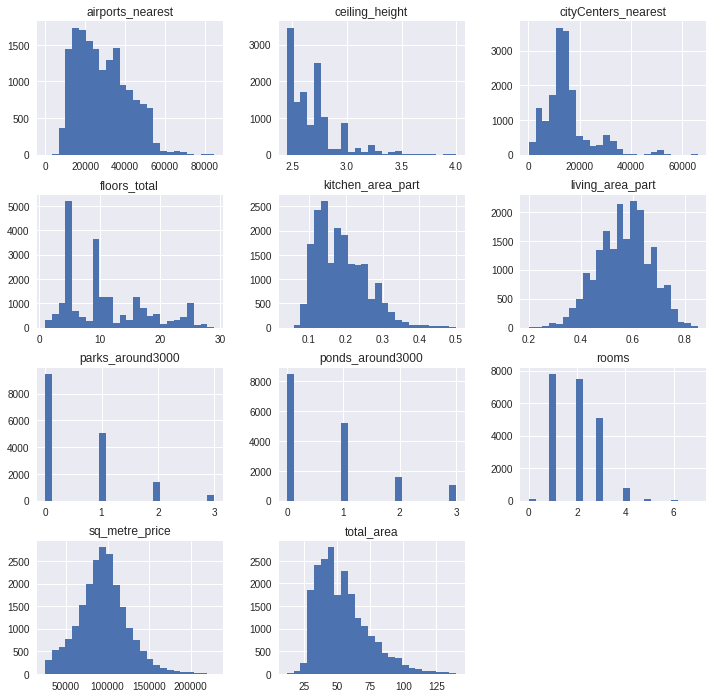

In [50]:
# Проверим как изменилось ли распределение после удаления
main_values=['sq_metre_price', 'total_area', 'rooms',
                    'living_area_part', 'kitchen_area_part',
                    'cityCenters_nearest', 'floors_total', 
                    'airports_nearest','ceiling_height',
                    'parks_around3000', 'ponds_around3000',]

df[main_values].hist(bins=25, figsize=(12, 12))

#### 2 Этап (вопросы)
* Каковы типичные параметры продаваемых квартир (например, площадь, цена)? Укажите наиболее важные характеристики и постройте графики. Сколько обычно длится процесс продажи?

* Уберите квартиры с очень высокой ценой и другими необычными параметрами. Опишите, какие особенности обнаружили.
Какие факторы больше всего влияют на стоимость квартиры? Отдельно изучите, зависит ли цена квадратного метра от числа комнат, этажа (первого или последнего), удалённости от центра и даты размещения: дня недели, месяца и года.

* Что можно сказать о цене квадратного метра в пригородах? Выберите 10 населённых пунктов с наибольшим числом объявлений. Эти данные можно отличить по имени в столбце 'locality_name'.

* Выделите сегменты типичных квартир в центре (по удалённости, числу комнат и площади) и вне центра. Границы определите самостоятельно. Выберите достаточно крупные сегменты с не менее 1000 объявлений. Сравните корреляцию основных факторов с ценой по всем предложениям и объявлениям в вашей выборке.

* Подберите наиболее характерные параметры для апартаментов, студий и квартир свободной планировки. Влияют ли они на цену? Сравните со схожими параметрами квартир типовой планировки.

##### Рассмотрим корреляцию основных параметров, влияющих на цену кв. метра, для различных видов квартир

In [51]:
# Исключим из выборки апартаменты, студии и квартиры свободной планировки
# Таким образом оставим квартиры типовой планировки
data = (df
         .query('is_apartment==False and studio==False and open_plan==False')
         .pivot_table(index='locality_name', 
            values=['sq_metre_price', 'total_area', 'rooms',
                    'living_area_part', 'kitchen_area_part',
                    'cityCenters_nearest', 'balcony',
                    'airports_nearest','ceiling_height',
                    'parks_around3000', 'ponds_around3000',], 
            aggfunc='mean')
        
        
       )
print('Количество населенных пунктов в выборке:', data.shape[0])
print()
print(data.corr().round(decimals=3).sort_values(by='sq_metre_price', ascending=False))


Количество населенных пунктов в выборке: 315

                     airports_nearest  balcony  ceiling_height  \
sq_metre_price                  0.034   -0.097           0.254   
kitchen_area_part               0.031   -0.152           0.283   
parks_around3000                0.091   -0.000          -0.120   
ceiling_height                 -0.049   -0.092           1.000   
ponds_around3000               -0.106    0.408          -0.028   
airports_nearest                1.000    0.118          -0.049   
balcony                         0.118    1.000          -0.092   
cityCenters_nearest             0.608    0.141          -0.411   
total_area                     -0.367    0.095           0.264   
living_area_part                0.099    0.082          -0.201   
rooms                          -0.065    0.044          -0.122   

                     cityCenters_nearest  kitchen_area_part  living_area_part  \
sq_metre_price                    -0.152              0.458            -0.349   

Для типовых квартир корреляция цены квадратного метра с основными параметрами слабая, менее 50 %   


In [52]:
# Добавим выборку если есть хотя бы один из вариантов: студия, апартаменты, свободная планировка
# Таким образом отдельно рассмотрим квартиры нетиповой планировки 
data = (df
         .query('is_apartment==True or studio==True or open_plan==True')
         .pivot_table(index='locality_name', 
            values=['sq_metre_price', 'total_area', 'rooms',
                    'living_area_part', 'kitchen_area_part',
                    'cityCenters_nearest', 'balcony',
                    'airports_nearest','ceiling_height',
                    'parks_around3000', 'ponds_around3000',], 
            aggfunc='mean')
        
        
       )
print('Количество населенных пунктов в выборке:', data.shape[0])
print()
print(data.corr().round(decimals=3).sort_values(by='sq_metre_price', ascending=False))

Количество населенных пунктов в выборке: 25

                     airports_nearest  balcony  ceiling_height  \
sq_metre_price                  0.090   -0.101           0.896   
parks_around3000                0.166   -0.158           0.913   
ceiling_height                  0.663   -0.393           1.000   
ponds_around3000               -0.124   -0.264           0.875   
rooms                           0.082   -0.012           0.077   
airports_nearest                1.000    0.043           0.663   
cityCenters_nearest            -0.119   -0.198           0.079   
kitchen_area_part               0.646   -0.963           0.399   
total_area                     -0.051   -0.124           0.060   
balcony                         0.043    1.000          -0.393   
living_area_part               -0.357    0.485          -0.465   

                     cityCenters_nearest  kitchen_area_part  living_area_part  \
sq_metre_price                     0.079              0.049            -0.275   


Для нетиповых квартир наблюдается сильная корреляция между ценой квадратного метра и окружением (парки, пруды), а также высотой потолка
* Парки в радиусе 3 км - 91.8 % 
* Высота потолков - 89.6 %  
* Пруды в радиусе 3 км - 71.5 %

##### Сравним корреляцию параметров с ценой за кв.метр для типовых квартир и нетиповых 

##### Вывод
----------
Корреляция цены кв. метра и основных параметров для типовых квартир слабая (менее 50%):  
* Больше всего (но слабо) влияет доля кухни в общей площади (44.6 %)  
-----------
На цену кв. метра в нетиповых квартирах сильно влияют:  
* Парки в радиусе 3 км - 91.8 % 
* Высота потолков - 89.6 %  
* Пруды в радиусе 3 км - 71.5 %
-----------

##### Рассмотрим корреляцию основных параметров для квартир в центре и за его пределами

In [53]:
data = (df
         .query('city_center_category=="центр" or city_center_category=="средне"')
         .pivot_table(index='id', 
            values=['sq_metre_price', 'total_area', 'rooms',
                    'living_area_part', 'kitchen_area_part',
                    'cityCenters_nearest', 'balcony',
                    'airports_nearest','ceiling_height',
                    'parks_around3000', 'ponds_around3000',], 
            aggfunc='mean')
        
        
       )
print('Количество объектов в выборке:', data.shape[0])
print()
print(data.corr().round(decimals=3).sort_values(by='sq_metre_price', ascending=False))

Количество объектов в выборке: 2324

                     airports_nearest  balcony  ceiling_height  \
sq_metre_price                  0.173    0.228          -0.116   
kitchen_area_part               0.102    0.112          -0.104   
balcony                         0.039    1.000          -0.197   
airports_nearest                1.000    0.039          -0.101   
cityCenters_nearest             0.338    0.174          -0.254   
ponds_around3000               -0.030    0.024           0.016   
parks_around3000               -0.002   -0.139           0.138   
ceiling_height                 -0.101   -0.197           1.000   
living_area_part               -0.101   -0.151           0.115   
total_area                     -0.111   -0.070           0.279   
rooms                          -0.111   -0.130           0.222   

                     cityCenters_nearest  kitchen_area_part  living_area_part  \
sq_metre_price                     0.078              0.425            -0.354   
kitchen_

In [54]:
data = (df
         .query('city_center_category=="далеко"')
         .pivot_table(index='id', 
            values=['sq_metre_price', 'total_area', 'rooms',
                    'living_area_part', 'kitchen_area_part',
                    'cityCenters_nearest', 'balcony',
                    'airports_nearest','ceiling_height',
                    'parks_around3000', 'ponds_around3000',], 
            aggfunc='mean')
        
        
       )
print('Количество объектов в выборке:', data.shape[0])
print()
print(data.corr().round(decimals=3).sort_values(by='sq_metre_price', ascending=False))

Количество объектов в выборке: 8015

                     airports_nearest  balcony  ceiling_height  \
sq_metre_price                  0.017    0.062           0.279   
kitchen_area_part               0.058    0.046           0.109   
ceiling_height                  0.012   -0.010           1.000   
ponds_around3000               -0.016   -0.014           0.138   
balcony                         0.008    1.000          -0.010   
parks_around3000                0.139   -0.016           0.115   
airports_nearest                1.000    0.008           0.012   
total_area                      0.062    0.042           0.330   
cityCenters_nearest            -0.055    0.082          -0.221   
rooms                          -0.032   -0.021           0.047   
living_area_part               -0.104   -0.070          -0.154   

                     cityCenters_nearest  kitchen_area_part  living_area_part  \
sq_metre_price                    -0.136              0.407            -0.385   
kitchen_

##### Вывод
------------
Преобладание влияния того или иного параметра на цену кв.метра для квартир в центре и за его пределами не выявлено  
Корреляция цены с основными параметрами в обоих случая слабая (менее 50 %)  
Возможно зависимость более сложная и не выявляется с помощью коэффициента корреляции.  

#### Отдельное изучение влияние параметров на цену 

In [55]:
# Близость к центру и к аэропорту
column_list_1 = ['airports_nearest','cityCenters_nearest']

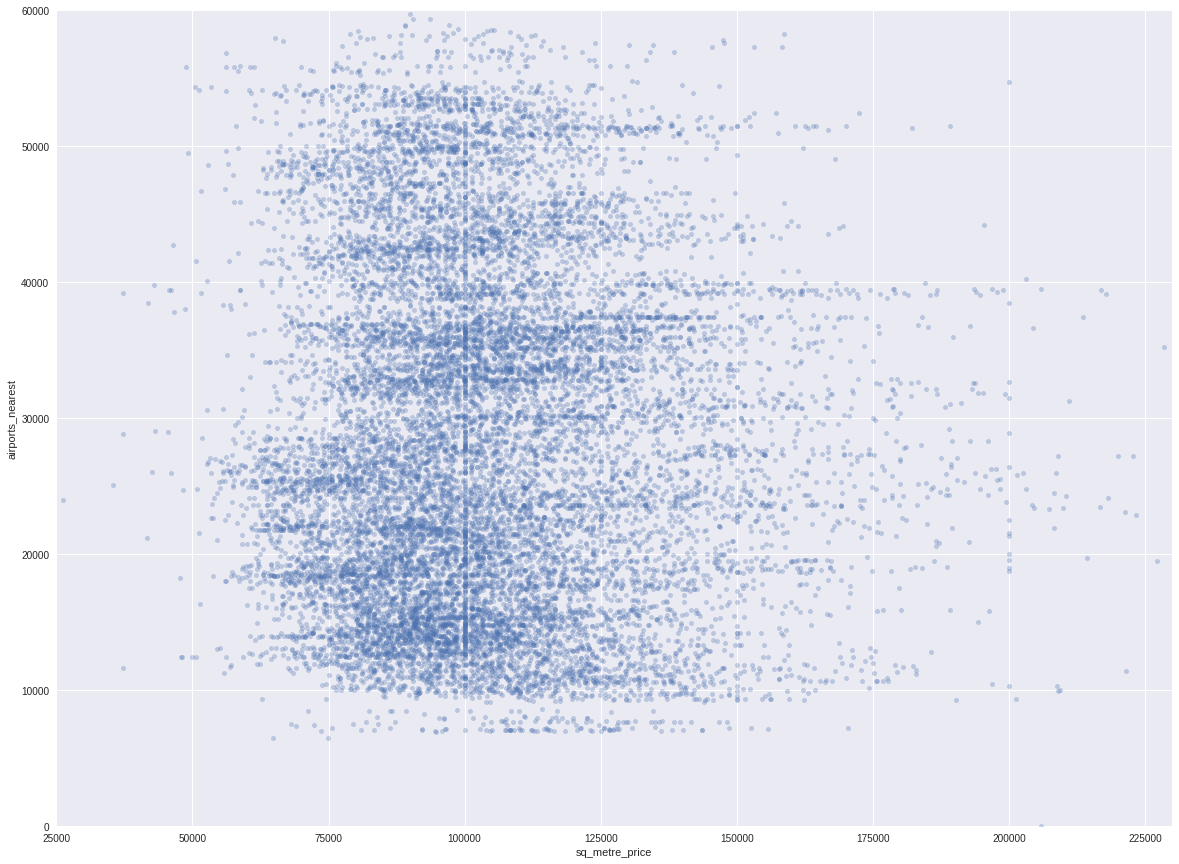

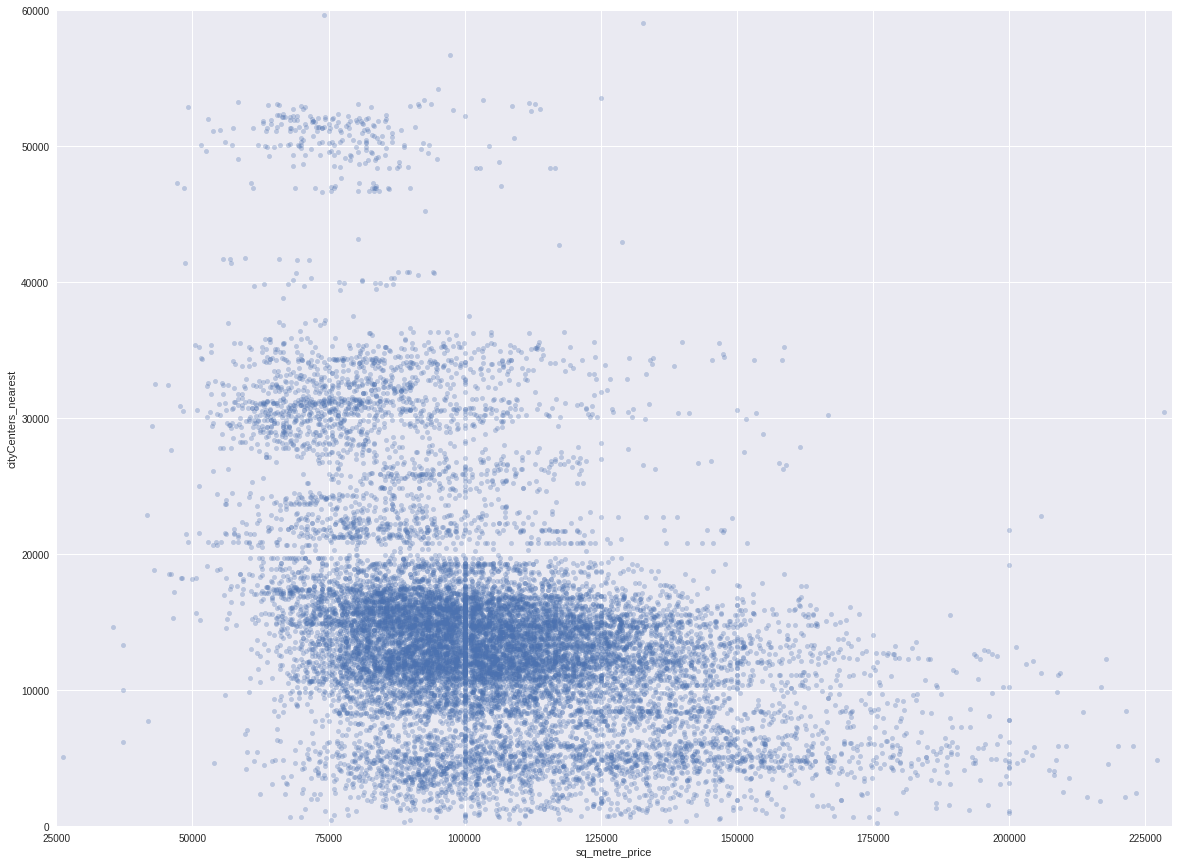

In [56]:
for column in column_list_1:
 
    df.plot(x='sq_metre_price', y=column, xlim=(25000, 230000),ylim=(0, 60000), 
            kind='scatter', grid=True, figsize=(20, 15), alpha=0.3)


#### Вывод:  
------------
 * Влияние близости аэропорта и центра города:
   * Близость к аэропорту практически не влияет на цену кв.метра - "облако предложений" не имеет ярко выраженного наклона, предложения распределены перпендикулярно оси с ценой
   * А вот закономерная зависимость цены от близости к центру есть - наклон "облаков предложений" показывает, что чем дальше от центра, тем меньше стоит квадратный метр. 

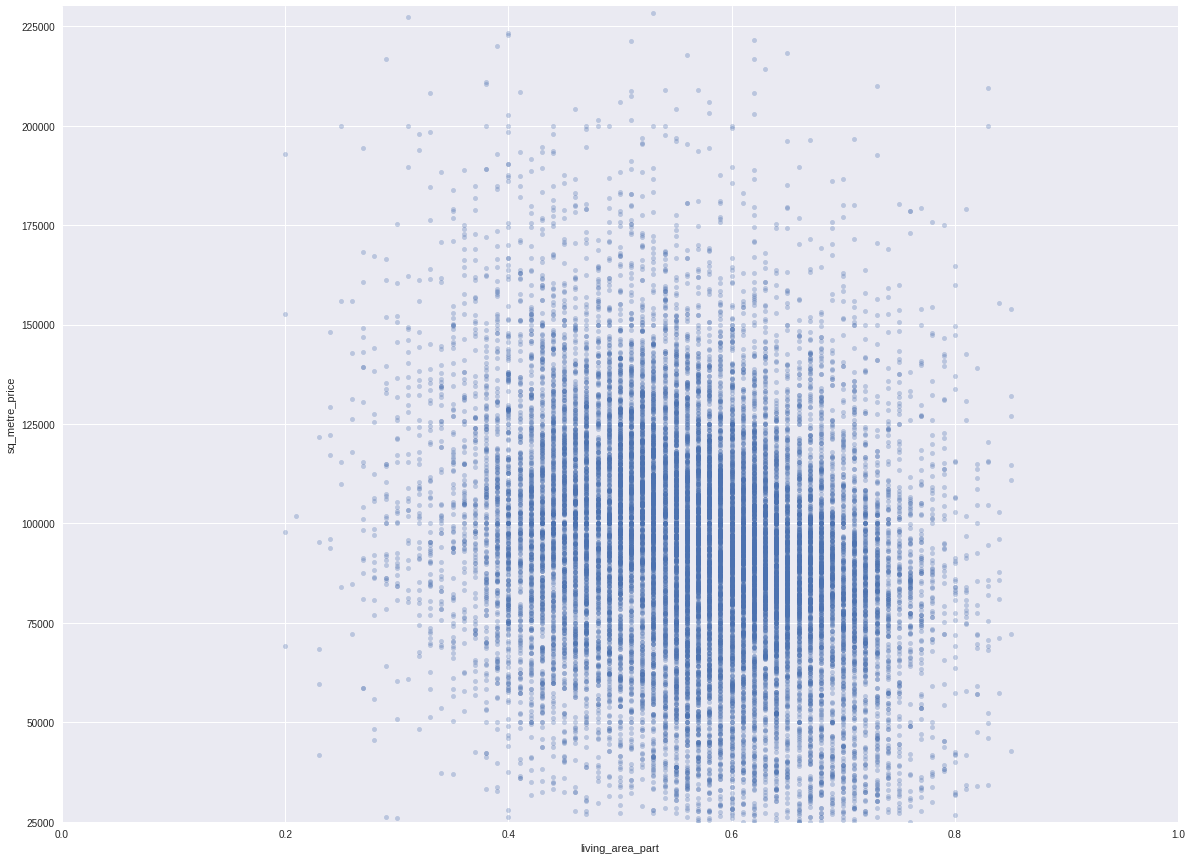

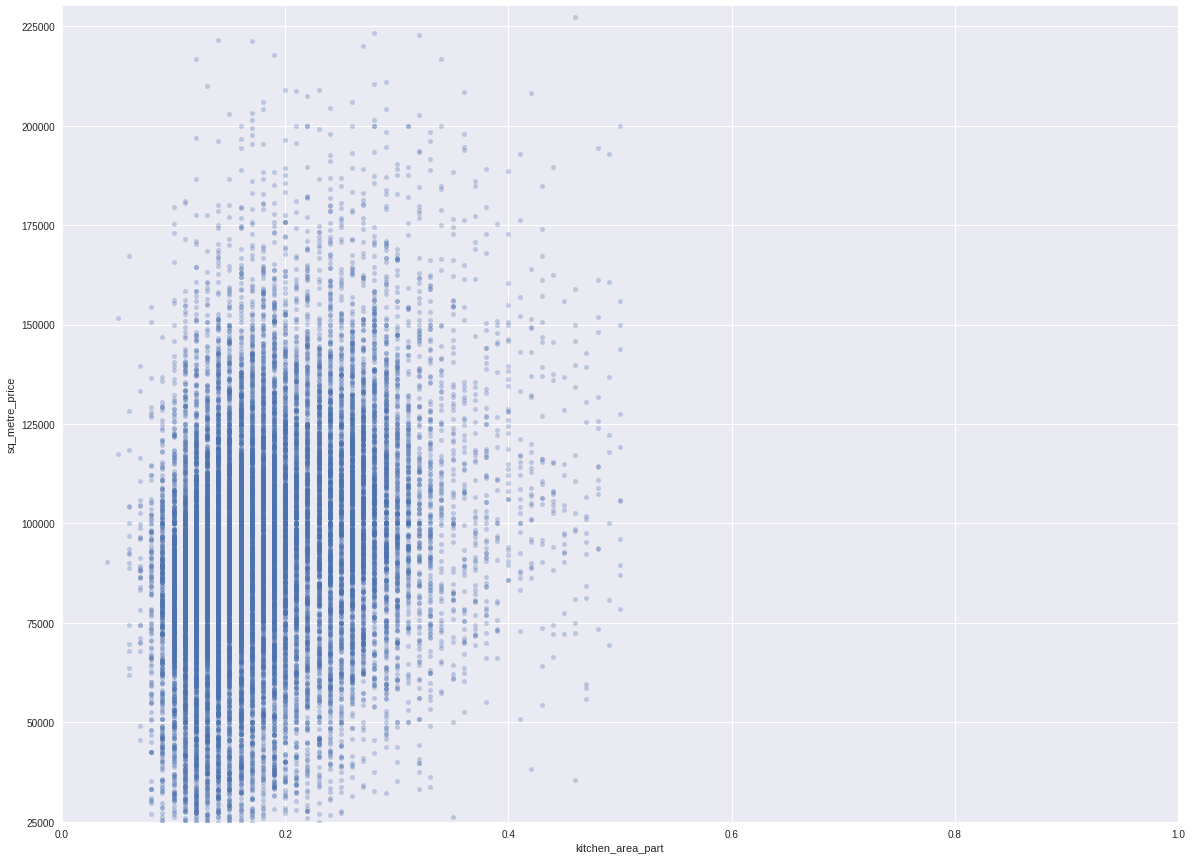

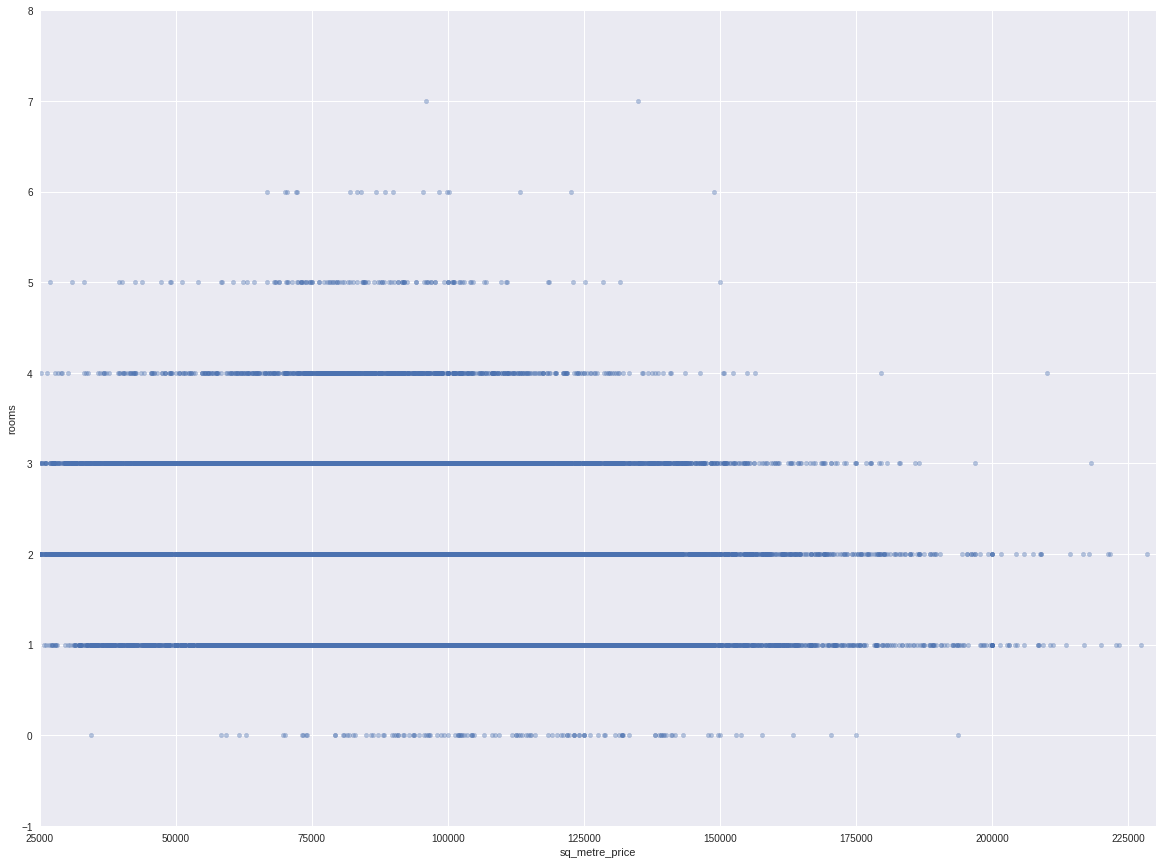

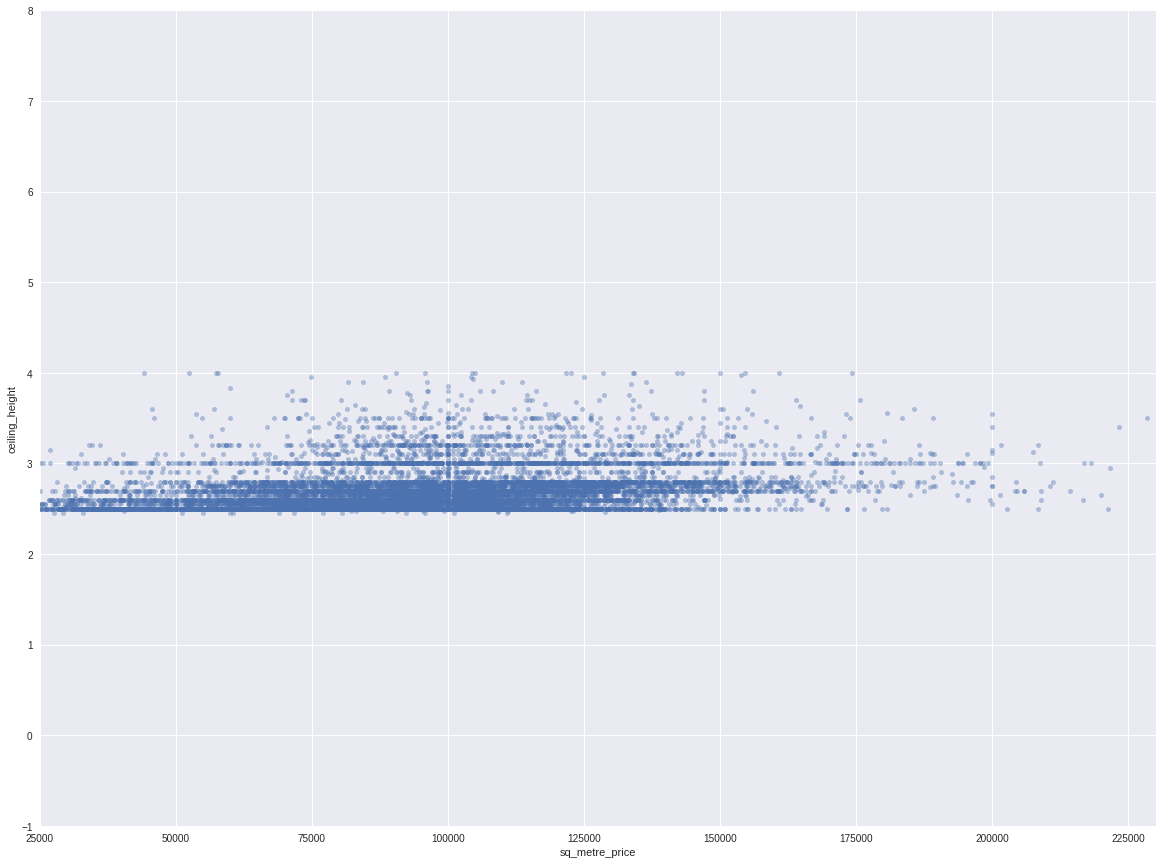

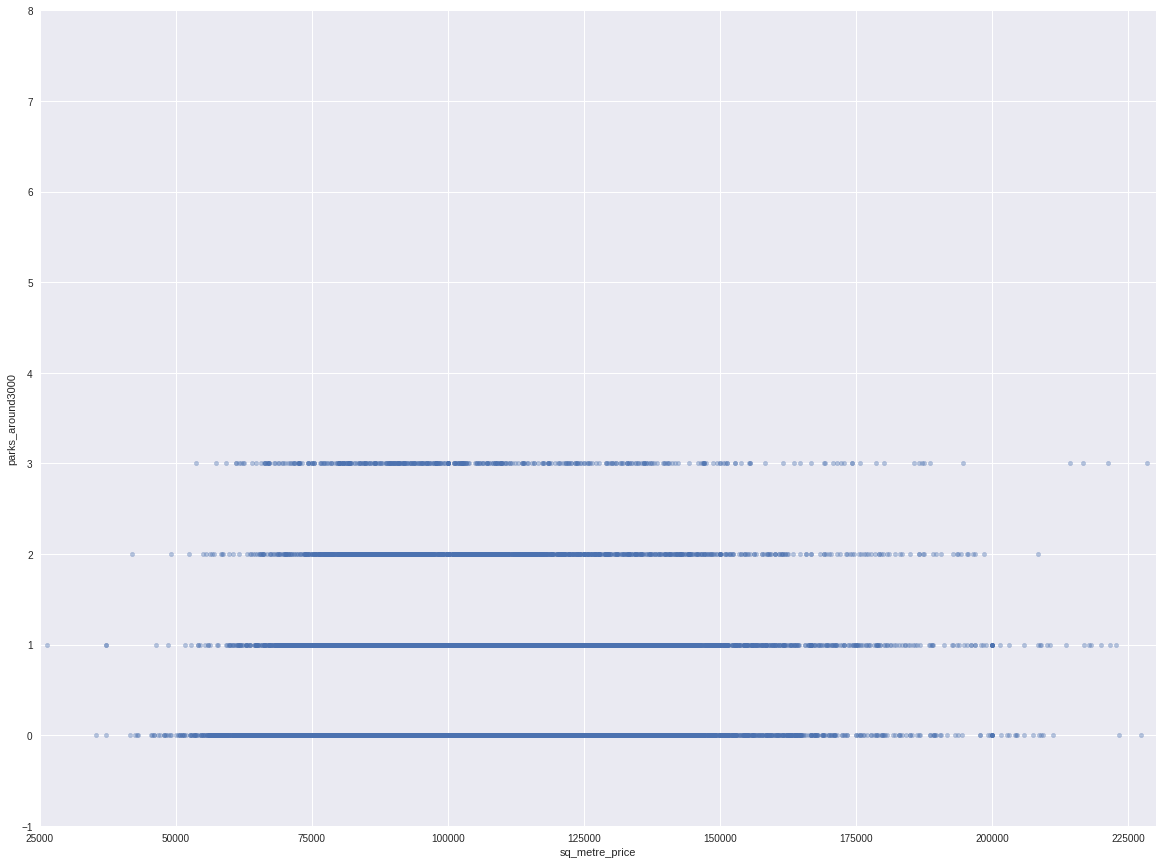

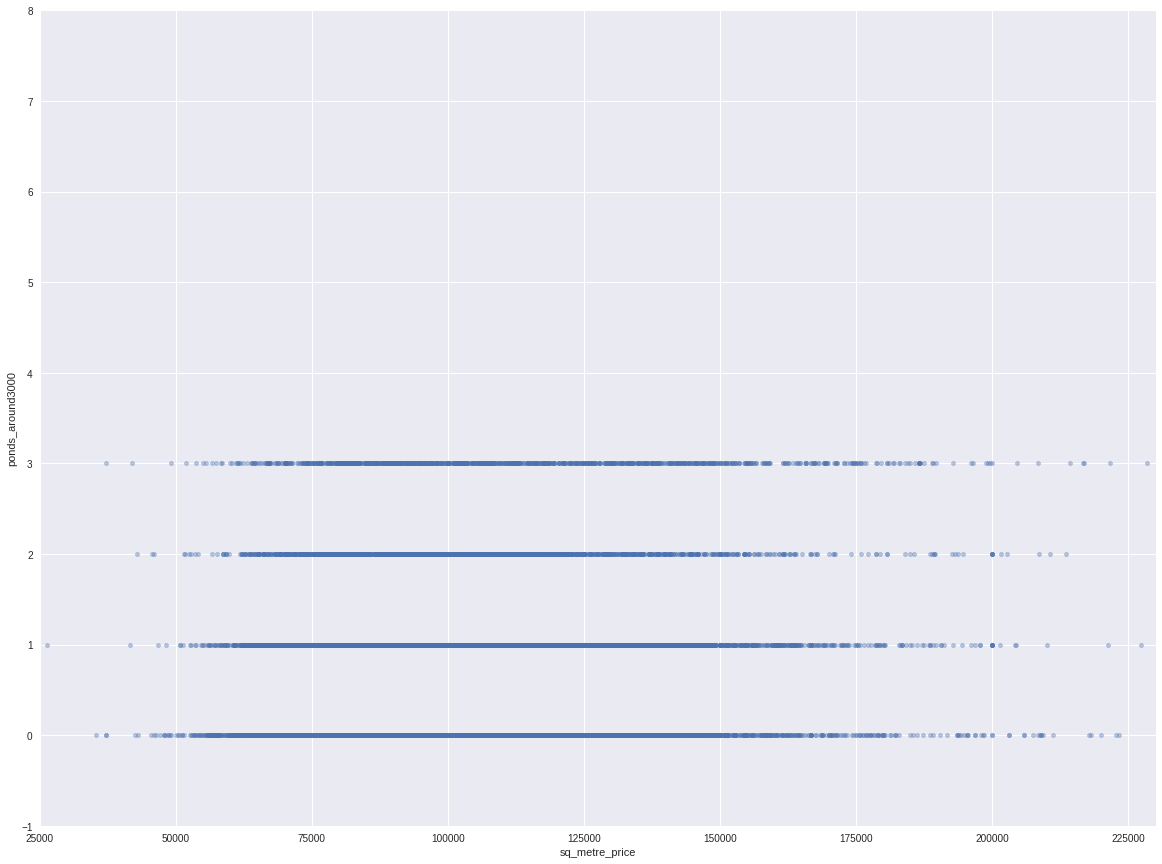

In [57]:
column_list_2 = ['living_area_part', 'kitchen_area_part']

column_list_3 = ['rooms', 'ceiling_height', 'parks_around3000', 
                 'ponds_around3000']

# Также построим диаграммы для списка  column_list_2
for column in column_list_2:
    df.plot(y='sq_metre_price', x=column, ylim=(25000, 230000),xlim=(0, 1), 
            kind='scatter', grid=True, figsize=(20, 15), alpha=0.3)
    
# Также построим диаграммы для списка  column_list_3    
    
for column in column_list_3:
    df.plot(x='sq_metre_price', y=column, xlim=(25000, 230000),ylim=(-1, 8), 
            kind='scatter', grid=True, figsize=(20, 15), alpha=0.4)

#### Вывод:  
1) Чем больше доля жилой площади, тем ниже цена  
2) Чем больше доля кухни, тем выше цена

3) Высота потолка, близость прудов и парков, не влияет на цену (графики представляют собой линии перпендикулярные линии)
* Сильное влияние этих параметров наблюдалось для квартир нетиповой планировки (студии, апартаменты, свободная планировка), но таких предложений на рынке мало, поэтому их вклад в общую картину невелик.   

4) Влияние количества комнат также не прослеживается по этому графику (линии перпендикулярны), хотя, вывод о том что чем больше комнат, тем ниже цена, можно сделать на основании графика с долей жилой площади (жилая площадь увеличивается с увеличеним количества комнат)
          

[0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9]


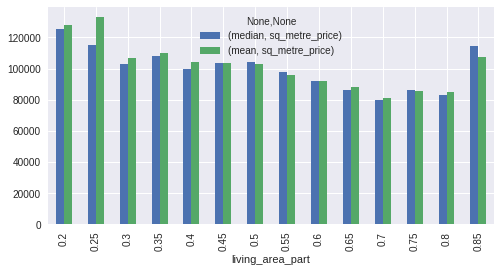

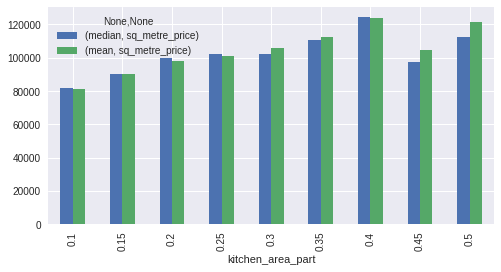

In [58]:
# Отдельно построим графики для доли жилой площади и доли кухни в общей площади квартиры

part = np.arange(0.1, 0.95, 0.05).round(decimals=2).tolist()
print(part)

(df
   .query('living_area_part== @part')
   .pivot_table(index='living_area_part', values='sq_metre_price', aggfunc=['median', 'mean'])
   .plot(kind='bar',figsize=(8, 4))
)

(df
   .query('kitchen_area_part== @part')
   .pivot_table(index='kitchen_area_part', values='sq_metre_price', aggfunc=['median', 'mean'])
   .plot(kind='bar',figsize=(8, 4))
)


* Цена квадратного метра имеет тенденцию к снижению, с ростом доли жилой площади, однако когда доля жилой площади становится более 70 % кв.метр снова вырастает.  
*  Увеличение доли кухни в общей площади повышает цену кв.метра  

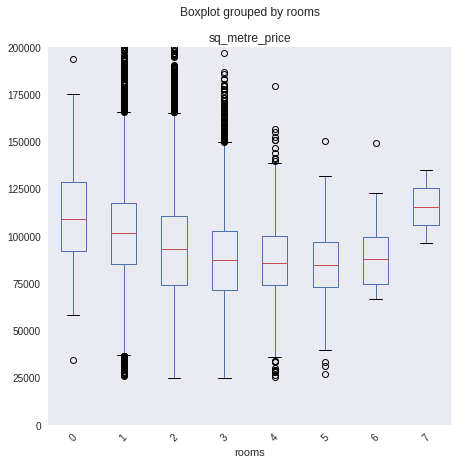

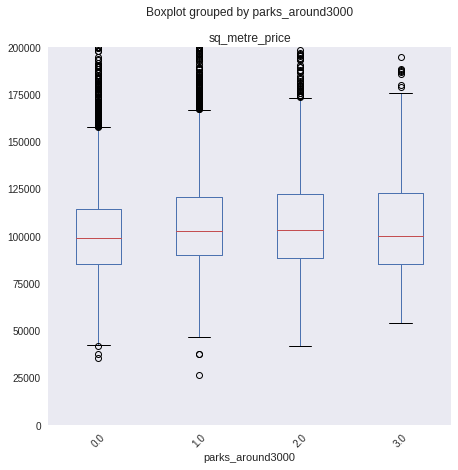

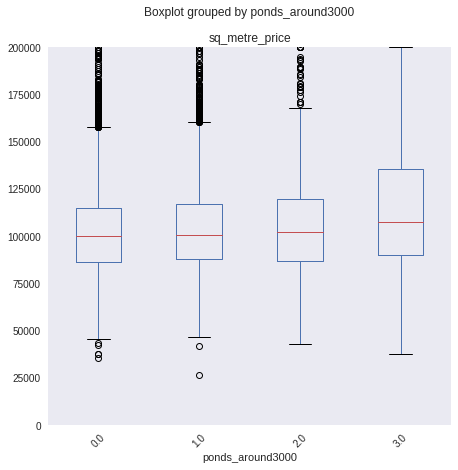

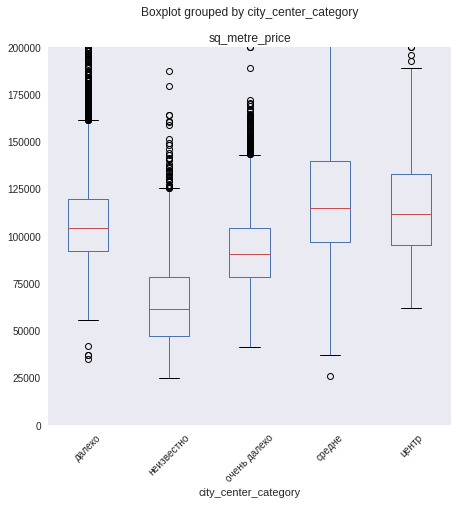

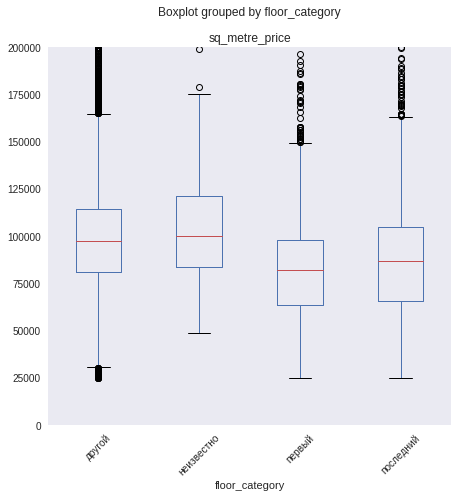

In [59]:
column_list_3 = ['rooms', 'parks_around3000', 
                 'ponds_around3000', 'city_center_category','floor_category']

for element in column_list_3:
    df.boxplot(by=element, column=['sq_metre_price'], grid=False, figsize=(7, 7), rot=45)
    plt.ylim(0, 200000)





#### Цена квадратного метра в пригородах

(0, 150000)

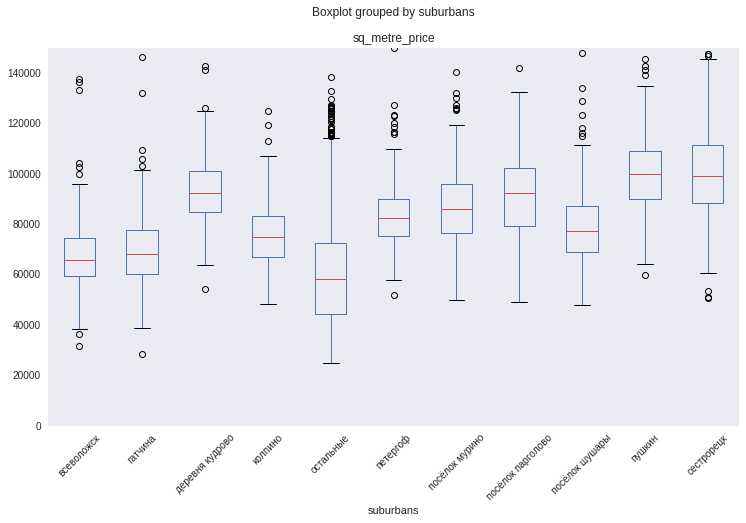

In [60]:
# Построим диаграмму 'ящик с усами' для оценки цен в пригородах
(df
   .query('suburbans != "СПБ"')
   .boxplot(by='suburbans', column=['sq_metre_price'], grid=False, figsize=(12, 7), rot=45)
)
#plt.xticks(rotation='vertical')
plt.ylim(0, 150000)

In [61]:
# Проведем числовую оценку
(df
   .query('suburbans != "СПБ"')
   .groupby('suburbans')['sq_metre_price']
   .describe()
   .round()   
)

,count,mean,std,min,25%,50%,75%,max
suburbans,,,,,,,,
всеволожск,387.0,67503.0,12666.0,31400.0,59439.0,65789.0,74434.0,137333.0
гатчина,299.0,69530.0,13699.0,28205.0,60317.0,67924.0,77419.0,146315.0
деревня кудрово,285.0,92900.0,12584.0,54336.0,84545.0,92307.0,100961.0,142857.0
колпино,336.0,75664.0,12064.0,48214.0,66717.0,74861.0,82984.0,125000.0
остальные,4022.0,59616.0,19846.0,25000.0,44166.0,58139.0,72368.0,138235.0
петергоф,196.0,84877.0,17296.0,51612.0,75328.0,82240.0,89846.0,228392.0
посёлок мурино,506.0,86090.0,14630.0,50000.0,76388.0,86024.0,95698.0,140312.0
посёлок парголово,322.0,90803.0,17310.0,48850.0,79111.0,92252.0,102348.0,141891.0
посёлок шушары,438.0,79091.0,14449.0,47766.0,68656.0,77222.0,86976.0,147826.0


Из населенных пунктов, входящих в Топ-10, наименьшая медианная стоимость кв.метра во Всеволожске и Гатчине (медиана 65-58 тыс.рублей), наибольшая в Пушкине и Сестрорецке (медиана ~ 100 тыс.рублей). Также минимальная стоимость кв.метра в категории "остальные" (медиана 58 тыс.рублей) куда входят остальные населенные пункты не из списка Топ-10 (по объему предложения)

#### Оценка срока продажи недвижимости

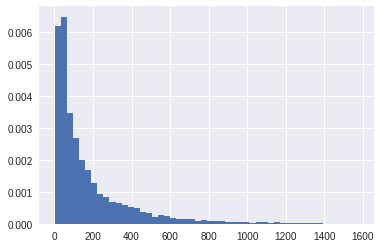

In [62]:
# построим гистограмму для оценки срока за который продается объект 
df['days_exposition'].hist(bins=50, density=1)


Похоже, что некоторые квартиры продаются очень быстро, посмотрим сколько, методом `describe() `

In [63]:
#df.query()
df['days_exposition'].describe()

count    18758.000000
mean       175.216068
std        214.318048
min          1.000000
25%         44.000000
50%         92.000000
75%        221.000000
max       1580.000000
Name: days_exposition, dtype: float64

В основном квартиры продаются за 3 месяца (медианное значение)  
Будем считать выбросами, все что продается больше 2 лет (730 дней)  

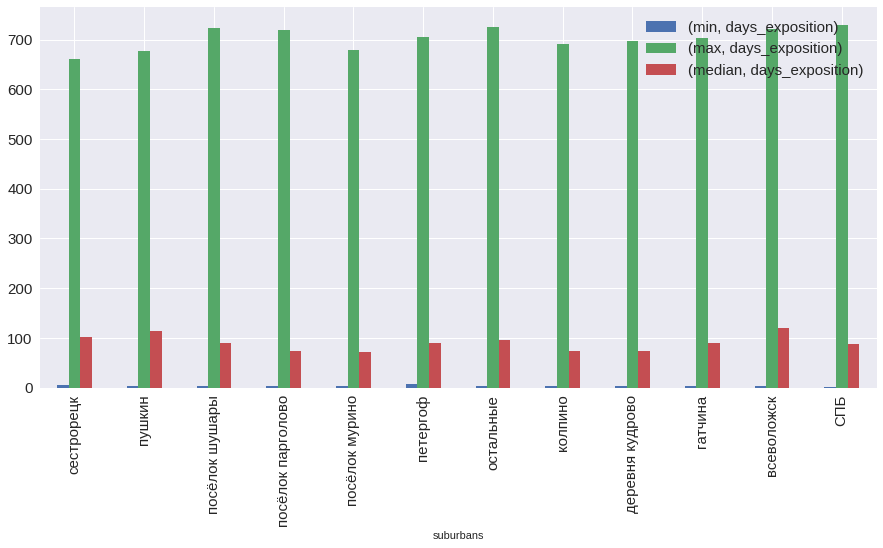

In [64]:
# Построим столбчатую диаграмму времени продажи жилья по регионам

(df
   .query('days_exposition <= 730')
   .pivot_table(index=['suburbans'], values='days_exposition', aggfunc=['min', 'max', 'median'])
   .sort_values(by='suburbans', ascending=False)
   .plot(kind='bar',figsize=(15, 7), fontsize=15)
   .legend(shadow=True, fontsize=15)
)

In [65]:
# Проведем числовую оценку времени продажи
(df
   .query('days_exposition <= 730')
   .groupby('suburbans')['days_exposition']
   .describe()
   .round()   
)


,count,mean,std,min,25%,50%,75%,max
suburbans,,,,,,,,
СПБ,11999.0,146.0,155.0,1.0,38.0,88.0,197.0,729.0
всеволожск,317.0,172.0,160.0,4.0,45.0,119.0,246.0,722.0
гатчина,246.0,151.0,151.0,3.0,45.0,90.0,213.0,704.0
деревня кудрово,266.0,137.0,147.0,3.0,44.0,74.0,181.0,698.0
колпино,300.0,128.0,139.0,3.0,40.0,74.0,170.0,692.0
остальные,3238.0,156.0,156.0,3.0,45.0,95.0,213.0,726.0
петергоф,162.0,154.0,160.0,7.0,44.0,90.0,202.0,706.0
посёлок мурино,483.0,121.0,128.0,3.0,34.0,72.0,168.0,679.0
посёлок парголово,291.0,136.0,142.0,3.0,44.0,74.0,181.0,719.0


Из числовой оценки видно что, стандартное отклонение близко к среднему значению, это хорошо, значит ничего важного не потеряно.
График и числовая оценка показывают, что обычно квартира продается за 3 месяца.

#### Оценка влияния даты размещения на цену

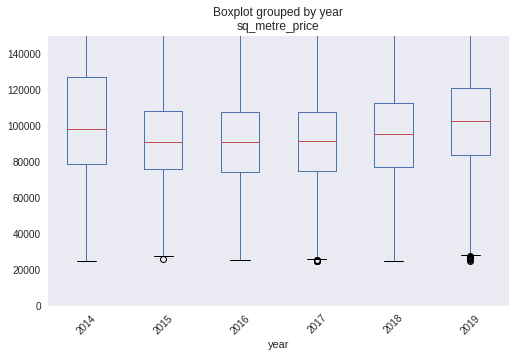

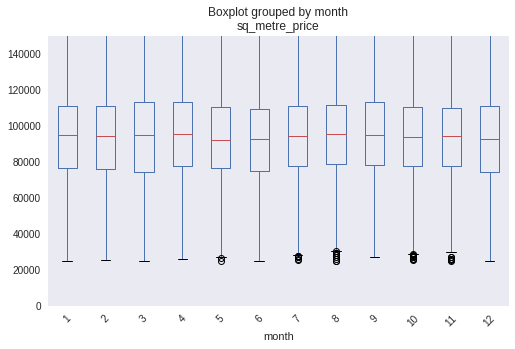

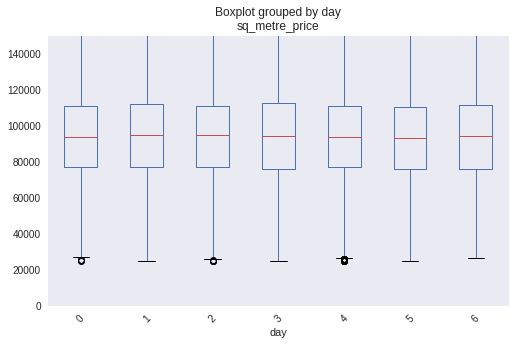

In [66]:
# Построим график "ящик с усами" 
# для оценки влияния года, месяца и дня размещения на цену

# Список переменных оси
date_columns = ['year', 'month', 'day']

# Цикл для автоматизации построения графиков
for element in date_columns:
    # "ящик с усами"
    df.boxplot(by=element, column=['sq_metre_price'],
              grid=False, figsize=(8, 5), rot=45)
    plt.ylim(0, 150000)



------------
##### Вывод
1) Месяц, и день размещения не влияют на цену кв.метра - это отчетливо видно по диаграмме "ящик с усами"  
   Также можно сказать что цены в 2019 году вернулись на уровень цен 2014 года, в период с 2015-2017 наблюдалось снижение цен,    в 2018 началось повышение цены.  
   
 * Максимальный объем предложения был зафиксирован в 2017-2018 годах
 * Больше всего предожений наблюдается в начале и конце года, летом традиционная "просадка"
 * Также больше всего объявлений появляется в будние дни, особенно во вторник, среду и пятницу.

------------

### Общий вывод 
---------------
1) Удаленность от центра и аэропорта
---------------
   * Близость к аэропорту практически не влияет на цену кв.метра - "облако предложений" не имеет ярко выраженного наклона, предложения распределены перпендикулярно оси с ценой
   * А вот закономерная зависимость цены от близости к центру есть - наклон "облаков предложений" показывает, что чем дальше от центра, тем меньше стоит квадратный метр.  
   * При этом категории: "неизвестно", "центр", "средне" и "далеко" имеют примерно одну цену (~ 110 тыс.рублей/кв.метр)
   * Категория "очень далеко" (более 15 км от центра), но отностится к СПб, составляет (~ 85 тыс.рублей/кв.метр) 
----------
* Для пригорода:   

   Из населенных пунктов, входящих в Топ-10, наименьшая медианная стоимость кв.метра во Всеволожске и Гатчине (медиана 65-        58 тыс.рублей), наибольшая в Пушкине и Сестрорецке (медиана ~ 100 тыс.рублей). Также минимальная стоимость кв.метра в          категории "остальные" (медиана 58 тыс.рублей) куда входят остальные населенные пункты не из списка Топ-10 (по объему            предложения)  

---------
2) От количества комнат
---------
 * Зависимость цены квадратного метра от количества комнат также не содержит аномалий, самые дорогие метры в студиях и 
   однокомнатных квартирах (медиана 100 - 110 тыс. рублей/кв.метр), затем наблюдается тренд на
   снижение цены квадратного метра, с выходом на ценовое "плато"  (медиана ~ 85 тыс. рублей/кв.метр) в квартирах где от 3 до 5 комнат и ростом цены для 6-7 комнатных квартир (до ~120 тыс. рублей/кв.метр по медиане) (в данном случае это скорее всего элитное жилье)
-------------
3) От категории этажа
-------------
* Категория этажа влияет на цену: меньше всего стоят квартиры на последнем этаже (~ 80-85 тыс. рублей/кв.метр), дороже на последнем (~ 90 тыс. рублей/кв.метр),
  но самые дорогие на промежуточных этажах  (~ 100 тыс. рублей/кв.метр), и похожее значение цены занимают квартиры у которых этаж неизвестен, скорее всего это тоже квартиры на промежуточных этажах
-------------
4) Доля жилой площади и доля кухни
-------------
* Цена квадратного метра имеет тенденцию к снижению, с ростом доли жилой площади, однако когда доля жилой площади становится более 70 % кв.метр снова вырастает.  
*  Увеличение доли кухни в общей площади повышает цену кв.метра
-------------
5) Категория квартиры (типовая, нетиповая)
-------------
* На цену кв.метра типовых квартир практически не оказывают влияния параметры окружения (парки, пруды), расположение (близость к аэропорту), за исключением близости к центру(см. п.1).  
* На цену нетиповых квартир (студии, свободная планировка, апартаменты) влияние окружения очень сильное:  
    * Парки в радиусе 3 км - 91.8 % 
    * Высота потолков - 89.6 %  
    * Пруды в радиусе 3 км - 71.5 %
-------------    
* Не выявлено отличий во влиянии основных параметров на цену квартир в центре и за его пределами. 
-------------
6) Оценка срока продажи квартиры
-------------
* Квартира в среднем (и по медиане) продается за 3 месяца.
-------------
7) Влияние даты размещения
-------------
1) Месяц, и день размещения не влияют на цену кв.метра - это отчетливо видно по диаграмме "ящик с усами"  
   Также можно сказать что цены в 2019 году вернулись на уровень цен 2014 года, в период с 2015-2017 наблюдалось снижение цен,    в 2018 началось повышение цены.  
